# imports

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (15,7)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from numpy.random import RandomState
state = RandomState(12345)
from scipy import stats as st

# data load

In [4]:
gd_0 = pd.read_csv('geo_data_0.csv')
gd_1 = pd.read_csv('geo_data_1.csv')
gd_2 = pd.read_csv('geo_data_2.csv')

In [5]:
gd_0.describe(percentiles=[0, 0.5, 0.9, 0.99])

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
0%,-1.408605,-0.848218,-12.088328,0.000000
50%,0.502360,0.250252,2.515969,91.849972
90%,1.794422,0.941442,6.695514,152.649988
99%,2.082334,1.121338,9.969349,180.351516
max,2.362331,1.343769,16.003790,185.364347


In [6]:
gd_1.describe(percentiles=[0, 0.5, 0.9, 0.99])

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
0%,-31.609576,-26.358598,-0.018144,0.000000
50%,1.153055,-4.813172,2.011479,57.085625
90%,12.767695,1.781792,4.998679,134.766305
99%,18.863531,7.139352,5.007810,137.945408
max,29.421755,18.734063,5.019721,137.945408


In [7]:
gd_2.describe(percentiles=[0, 0.5, 0.9, 0.99])

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
0%,-8.760004,-7.084020,-11.970335,0.000000
50%,0.009424,-0.009482,2.484236,94.925613
90%,2.228062,2.219972,6.973332,155.391030
99%,4.057783,4.020189,10.511973,184.995815
max,7.238262,7.844801,16.739402,190.029838


In [8]:
#проверка на дубликаты и пропуски в данных, корректные типы данных
region_dfs = [gd_0, gd_1, gd_2]

for i in range(len(region_dfs)):
    print('region', i)
    region_dfs[i].info()
    print('duplicates', region_dfs[i].isnull().sum(), '\n')
    print('duplicates', region_dfs[i].duplicated().sum())

region 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
duplicates id         0
f0         0
f1         0
f2         0
product    0
dtype: int64 

duplicates 0
region 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
duplicates

# data analysis

проанализируем сначала один df, потом соберем все в функцию 

In [9]:
for i in range(len(region_dfs)):
    region_dfs[i]['region'] = i
    print(region_dfs[i].head())

df = pd.concat(region_dfs).reset_index()

      id        f0        f1        f2     product  region
0  txEyH  0.705745 -0.497823  1.221170  105.280062       0
1  2acmU  1.334711 -0.340164  4.365080   73.037750       0
2  409Wp  1.022732  0.151990  1.419926   85.265647       0
3  iJLyR -0.032172  0.139033  2.978566  168.620776       0
4  Xdl7t  1.988431  0.155413  4.751769  154.036647       0
      id         f0         f1        f2     product  region
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103       1
1  62mP7  14.272088  -3.475083  0.999183   26.953261       1
2  vyE1P   6.263187  -5.948386  5.001160  134.766305       1
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408       1
4  AHL4O  12.702195  -8.147433  5.004363  134.766305       1
      id        f0        f1        f2     product  region
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673       2
1  WJtFt  0.262778  0.269839 -2.530187   56.069697       2
2  ovLUW  0.194587  0.289035 -5.586433   62.871910       2
3  q6cA6  2.236060 -0.553760  0.930038  114.

In [10]:
#проверка на уникальность айдишников скважины 
df['id'].value_counts().head()

uSye4    2
KUPhW    2
5ssQt    2
D8TNs    2
A5aEY    2
Name: id, dtype: int64

выяснилось, что и не такие уж они уникальные, может стоить подумтаь над тем, чтобы выкинуть, а может надо оставить. 

я ничего не удалял 

In [10]:
df.query('id == "fiKDv"')

,index,id,f0,f1,f2,product,region
16633,16633,fiKDv,0.157341,1.028359,5.585586,95.817889,0
90815,90815,fiKDv,0.049883,0.841313,6.394613,137.346586,0


In [11]:
df.shape

(300000, 7)

## feature analisys

feature f0
              f0                                
            mean    median        min        max
region                                          
0       0.500419  0.502360  -1.408605   2.362331
1       1.141296  1.153055 -31.609576  29.421755
2       0.002023  0.009424  -8.760004   7.238262


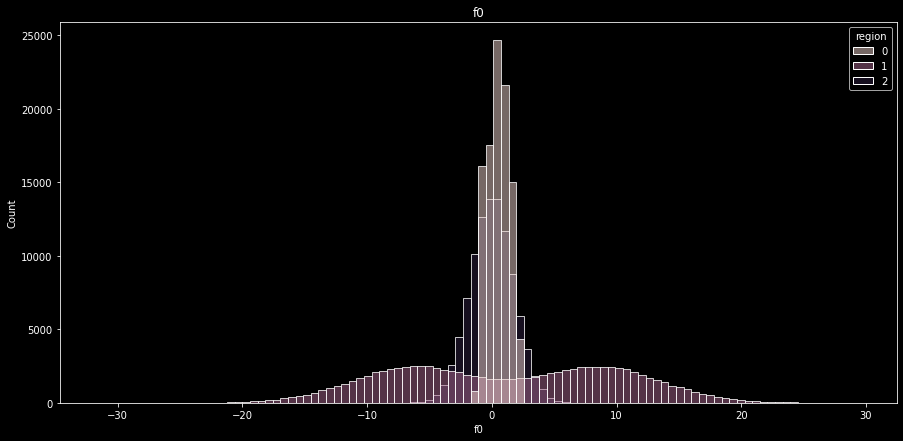

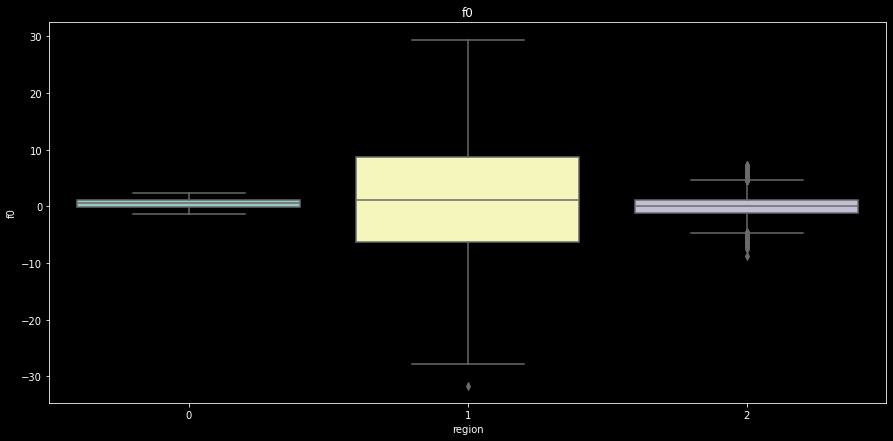

feature f1
              f1                                
            mean    median        min        max
region                                          
0       0.250143  0.250252  -0.848218   1.343769
1      -4.796579 -4.813172 -26.358598  18.734063
2      -0.002081 -0.009482  -7.084020   7.844801


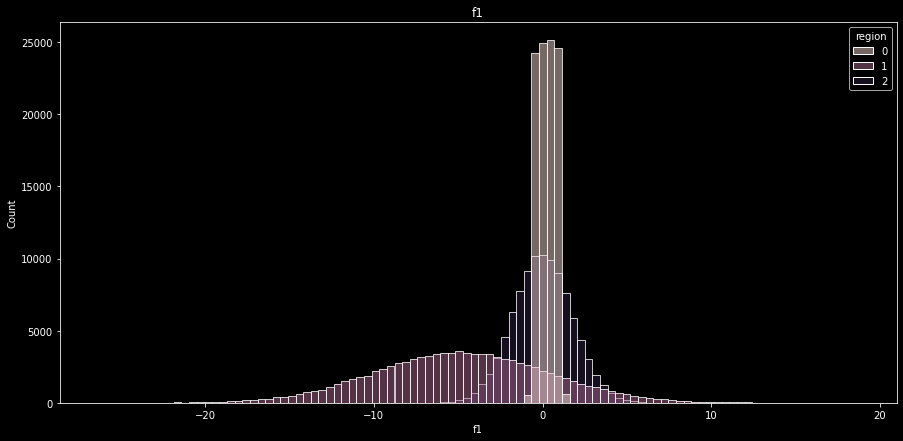

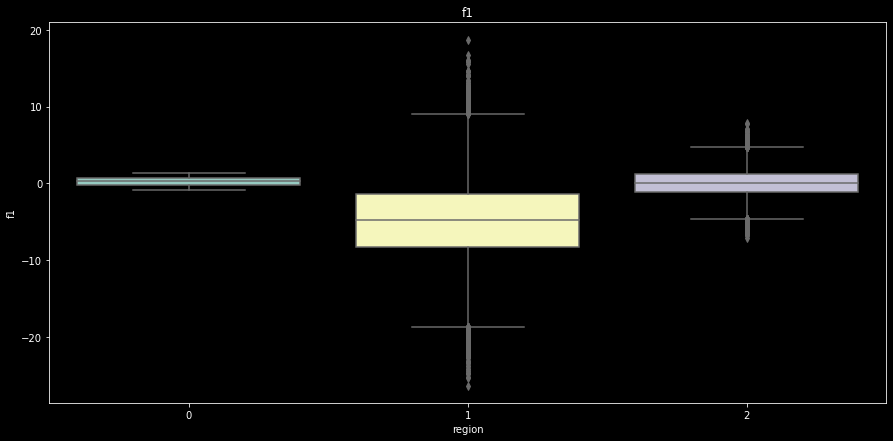

feature f2
              f2                                
            mean    median        min        max
region                                          
0       2.502647  2.515969 -12.088328  16.003790
1       2.494541  2.011479  -0.018144   5.019721
2       2.495128  2.484236 -11.970335  16.739402


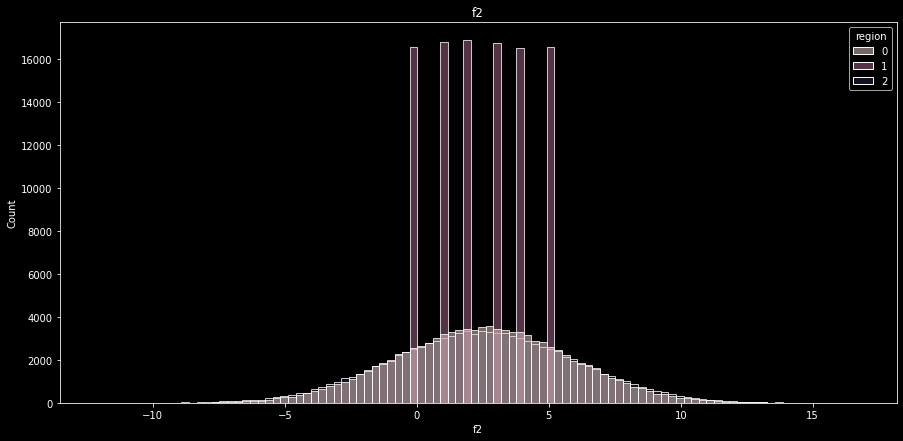

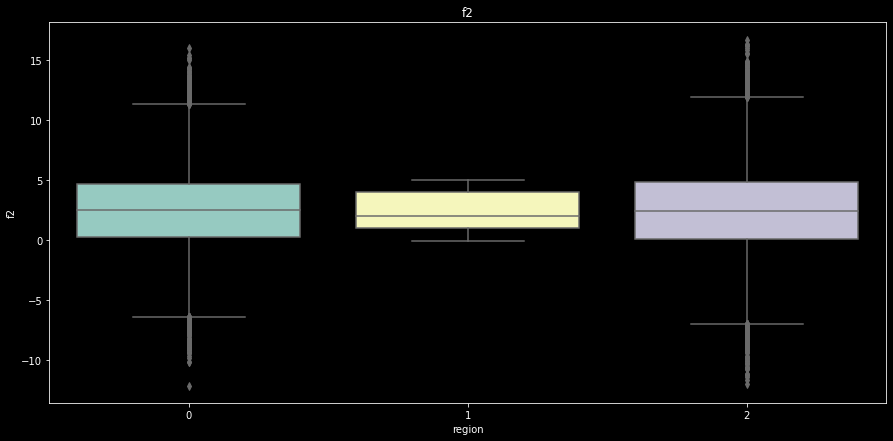

feature product
       product                            
          mean     median  min         max
region                                    
0       92.500  91.849972  0.0  185.364347
1       68.825  57.085625  0.0  137.945408
2       95.000  94.925613  0.0  190.029838


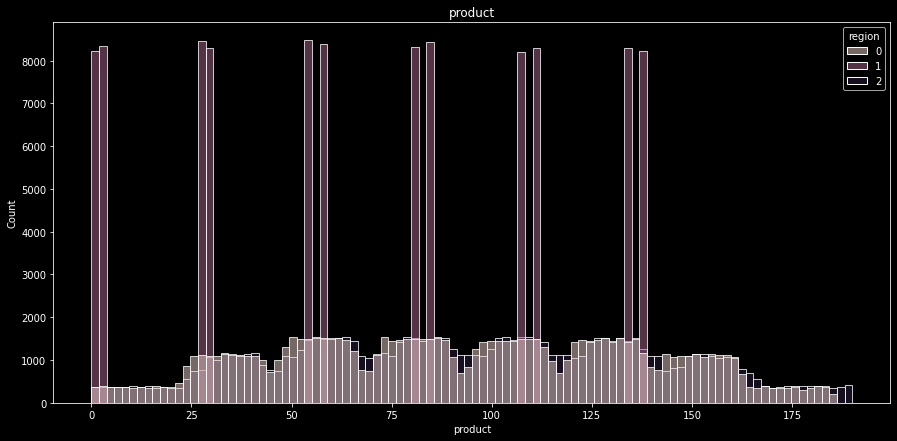

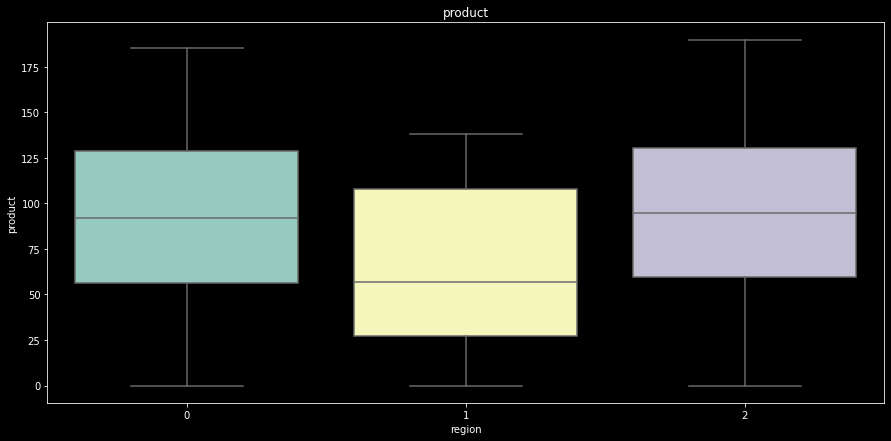

In [12]:
#посмотрим на каждую фичу в отдельности 
for col in ['f0', 'f1', 'f2', 'product']:
    print('feature', col)
    rep = df.groupby('region').agg({col:['mean', 'median', 'min', 'max']})
    print(rep)
    plt.title(col)
    sns.histplot(data=df[[col, 'region']], x=col, kde=False, hue='region', bins=100)
    plt.show()
    plt.title(col)
    sns.boxplot(data=df[[col, 'region']], y=col, x="region",) 
    plt.show()

## correlation

In [13]:
df

,index,id,f0,f1,f2,product,region
0,0,txEyH,0.705745,-0.497823,1.221170,105.280062,0
1,1,2acmU,1.334711,-0.340164,4.365080,73.037750,0
2,2,409Wp,1.022732,0.151990,1.419926,85.265647,0
3,3,iJLyR,-0.032172,0.139033,2.978566,168.620776,0
4,4,Xdl7t,1.988431,0.155413,4.751769,154.036647,0
...,...,...,...,...,...,...,...
299995,99995,4GxBu,-1.777037,1.125220,6.263374,172.327046,2
299996,99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846,2
299997,99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080,2
299998,99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253,2


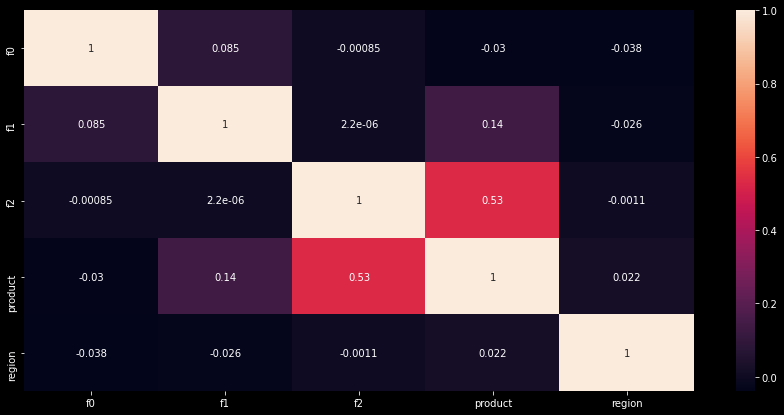

region 0


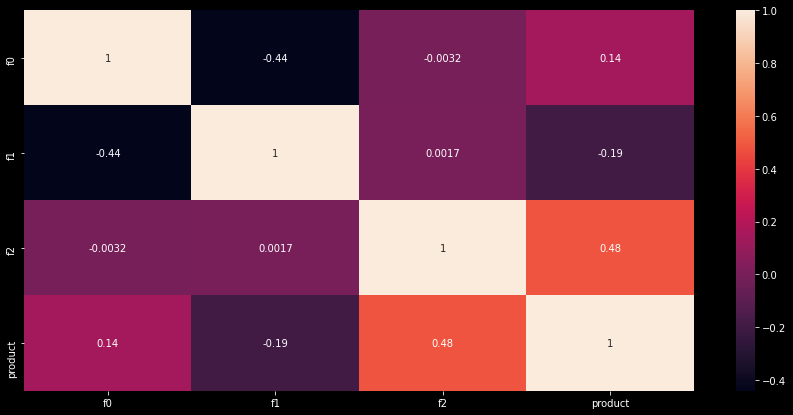

region 1


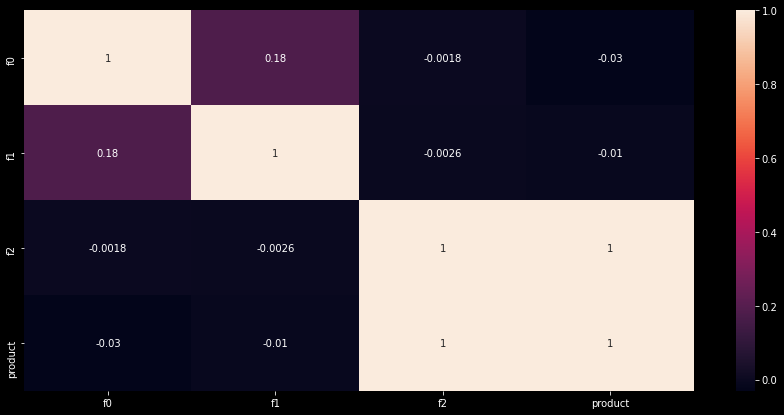

region 2


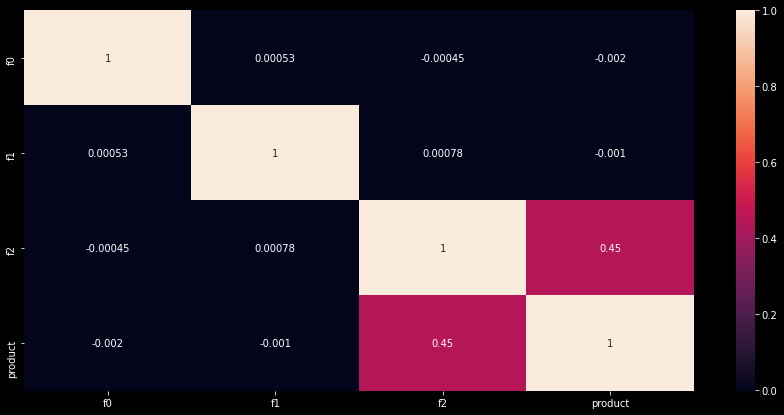

In [14]:
#общая корелляция 
sns.heatmap(df.drop(['id', 'index'], axis = 1).corr(), annot=True)
plt.show()
#по регионам 
for i in range(3):
    print('region', i)
    sns.heatmap(df.query('region == @i').drop(['id', 'index', 'region'], axis = 1).corr(), annot=True)
    plt.show()

ладно, получается у нас есть признаки с сильной корреляцией в определенных регионах и ОЧЕНЬ сильной. 
это должно помочь модели лучше предсказывать. думаю, особенно хорошо будет в region_1

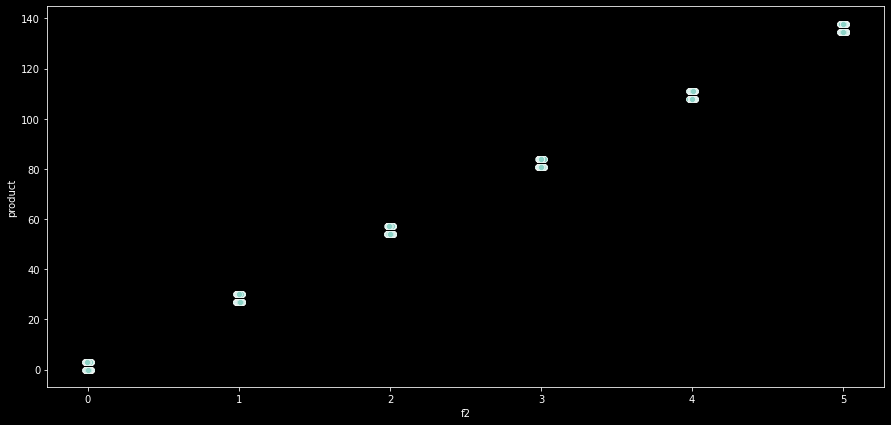

In [11]:
sns.scatterplot(data = gd_1, x="f2", y="product")
plt.show() 

и вот почему:  хоть линейку прикладывай

# reg model 

In [14]:
#почистим выбросы 
def df_clean(df_reg):
    for col in df_reg[features].columns:
        sns.boxplot(df_reg[col])
        plt.show()
        lower = np.percentile(df_reg[col], 2)
        upper = np.percentile(df_reg[col], 98)
        print(col)
        print(lower)
        print(upper)
        
        
        df_reg = df_reg[(df_reg[col]> lower) & (df_reg[col]<upper)]
        sns.boxplot(df_reg[col])
        plt.show()
        return df_reg 


def make_prediction(model, x_train, y_train, x_valid, y_valid): 

    sc = StandardScaler()
    sc.fit(x_train)
    x_train_sc = sc.transform(x_train)
    x_valid_sc = sc.transform(x_valid)

    model.fit(x_train_sc, y_train)
    #model.fit(x_train, y_train)

    pred = model.predict(x_valid_sc)
    mse = mean_squared_error(y_valid, pred)

    #print(mse**0.5)

    return model, sc

features = ['f0', 'f1', 'f2']
target = ['product']

In [15]:
reg_data = {} 
for i in range(3):
    reg_data[i] = {}
    reg_data[i]['model'] = None 
    reg_data[i]['x_test'] = None 
    reg_data[i]['y_test'] = None
    reg_data[i]['x_valid'] = None
    reg_data[i]['y_valid'] = None
    reg_data[i]['scaler'] = None

✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅
0
очистка выбросов


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


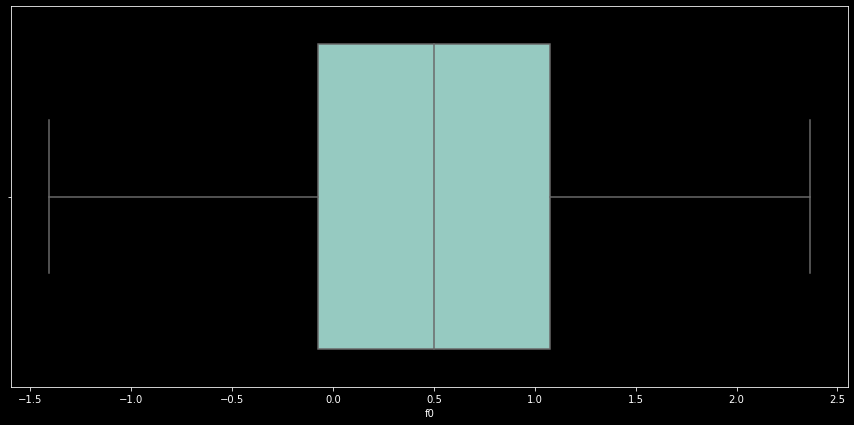

f0
-1.0326527818504694
2.032582219274543


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


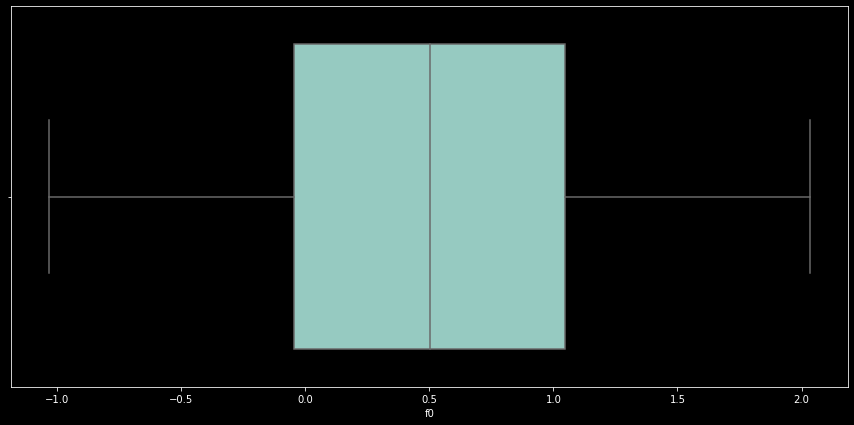

92.44755131093272 среднее в валидационной выборке
средний запас по модели 92.92822195220849
37.832800259808245 ошибка модели на валидационной выборке
✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅
1
очистка выбросов


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


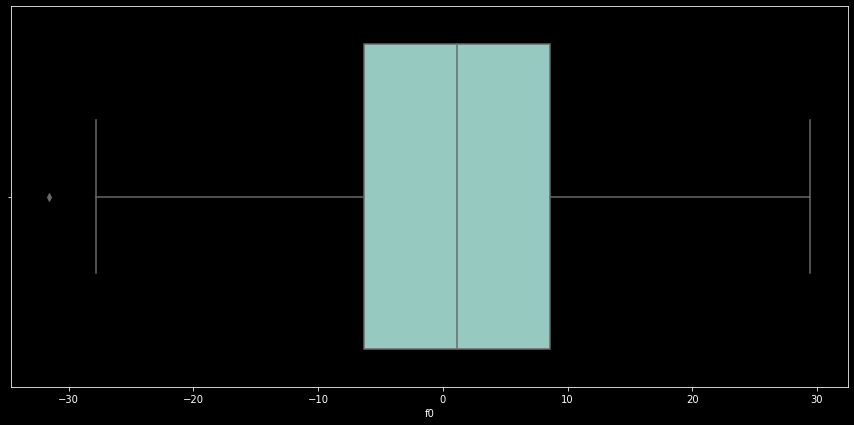

f0
-15.091037072486138
17.32902454986332


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


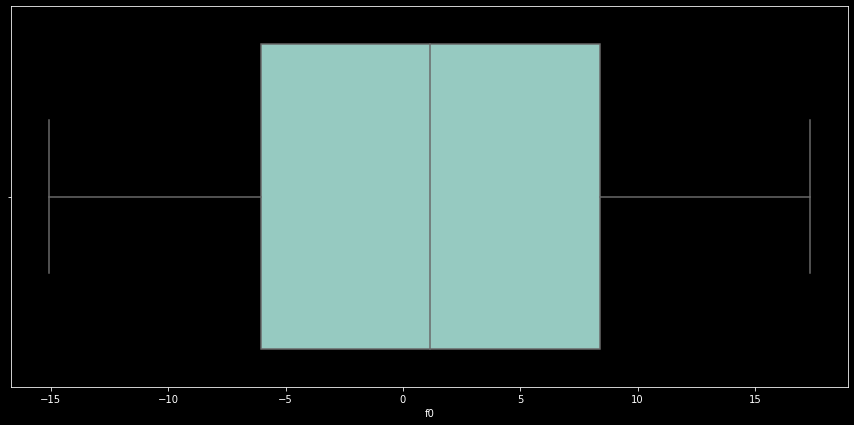

68.57852842576605 среднее в валидационной выборке
средний запас по модели 68.56849111166493
0.8715629992377955 ошибка модели на валидационной выборке
✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅
2
очистка выбросов


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


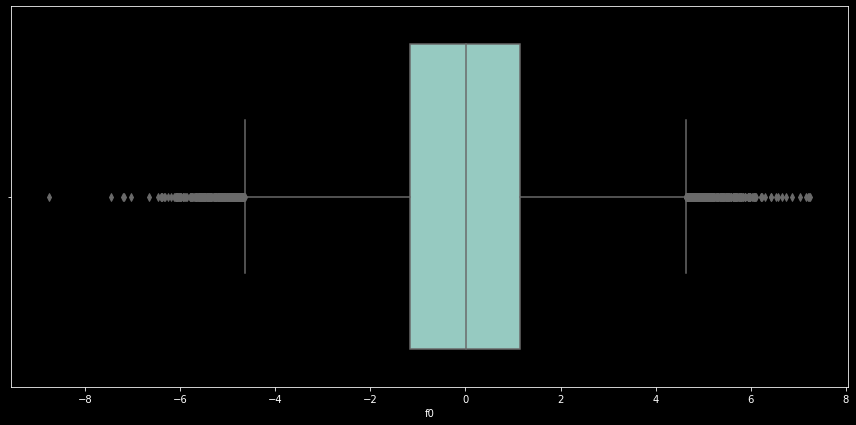

f0
-3.5478117200133066
3.5829020551815196


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


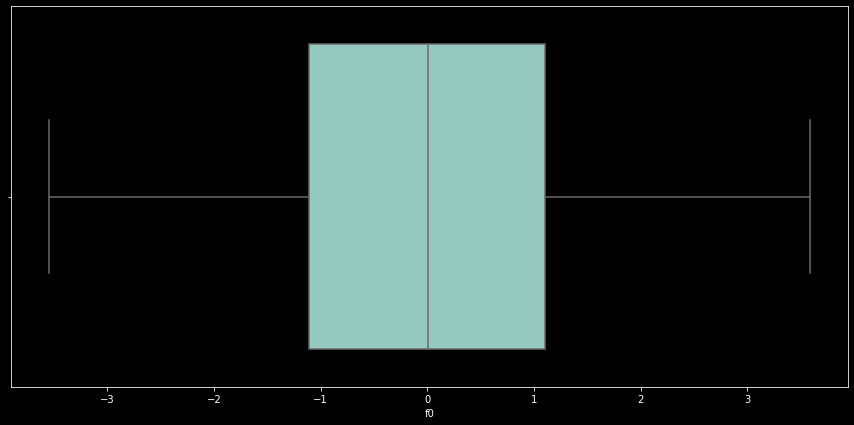

94.87850750833493 среднее в валидационной выборке
средний запас по модели 94.3189401101901
40.050422811039596 ошибка модели на валидационной выборке


In [16]:
for reg in range(3):
    print('✅'*100)
    print(reg)
    df_reg = df.query('region == @reg')
    print('очистка выбросов')
    df_reg = df_clean(df_reg)

    #train (train + valid) | test
    X_train, x_test, Y_train, y_test = train_test_split(df_reg[features], df_reg[target], test_size=0.1, random_state=42)
    #train | valid
    x_train, x_valid, y_train, y_valid  = train_test_split(X_train, Y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

    model = LinearRegression()
    lin_model, sc = make_prediction(model, x_train, y_train, x_valid, y_valid)

    print(y_valid['product'].mean(), 'среднее в валидационной выборке')
    pred = lin_model.predict(sc.transform(x_valid))
    print('средний запас по модели', pred.mean())
    print(mean_squared_error(y_valid, lin_model.predict(sc.transform(x_valid)))**0.5, 'ошибка модели на валидационной выборке')

    reg_data[reg]['model'] = lin_model
    reg_data[reg]['x_test'] = x_test
    reg_data[reg]['y_test'] = y_test
    reg_data[reg]['x_valid'] = x_valid
    reg_data[reg]['y_valid'] = y_valid
    reg_data[reg]['scaler'] = sc 

# revenue report

In [19]:
for i in range(len(region_dfs)):
    reg_df = region_dfs[i]
    average_product = reg_df['product'].mean()
    reg_data[i]['average_volumne'] = average_product
    print('region', i, 'average_volumne', average_product) 

region 0 average_volumne 92.50000000000001
region 1 average_volumne 68.82500000000002
region 2 average_volumne 95.00000000000004


In [18]:
#основные показатели для расчета прибыли 
points = 500 
best_treshold = 200 
budget = 10000000000
revenue_per_product = 450000
cost_per_point = budget/200
zero_revenue_volume = cost_per_point/revenue_per_product

region 0


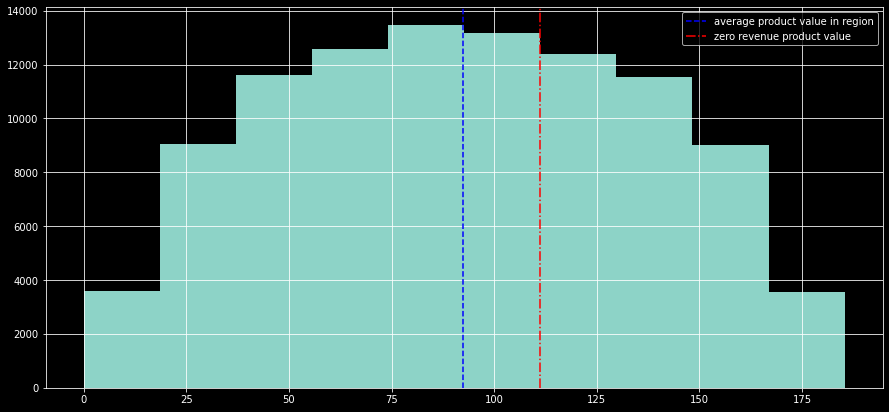

region 1


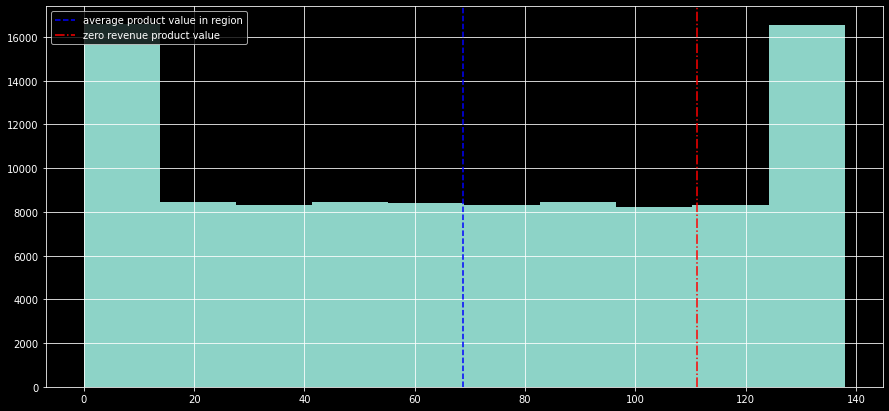

region 2


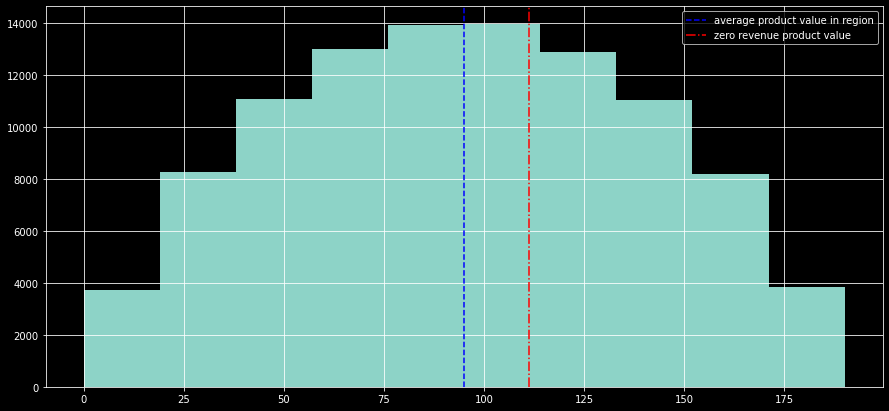

In [20]:
#сначала посмотрим сравним средний запас сырья и необходимый для безубыточной добычи в каждом регионе
for i in range(len(region_dfs)):

    reg_df = region_dfs[i]

    average_product = reg_df['product'].mean()
    print('region', i)
    reg_df['product'].hist()
    plt.axvline(average_product, color='b', linestyle = '--', label = 'average product value in region') # horizontal
    plt.axvline(zero_revenue_volume, color='r',  linestyle = '-.', label = 'zero revenue product value')
    plt.legend()
    plt.show()


prob of losses is 7.1 % for region 0
average revenue of 200 best points in region 0 is 386403597.23288953
95%-ый доверительный интервал среднего: (370244286.90757847, 402562907.5582006)
95%-ый доверительный интервал прибыли: -147754504.11342412 | 876666983.4125967


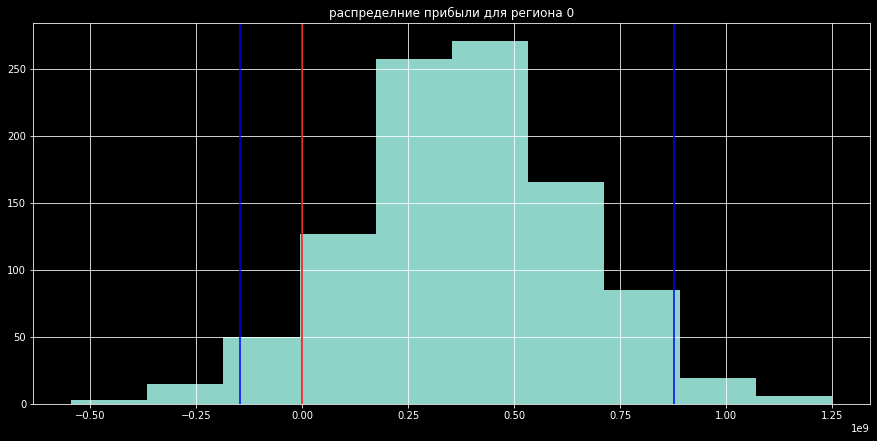

prob of losses is 2.3 % for region 1
average revenue of 200 best points in region 1 is 431156091.351138
95%-ый доверительный интервал среднего: (418388687.5846153, 443923495.1176607)
95%-ый доверительный интервал прибыли: 8876821.310124623 | 845243767.7660012


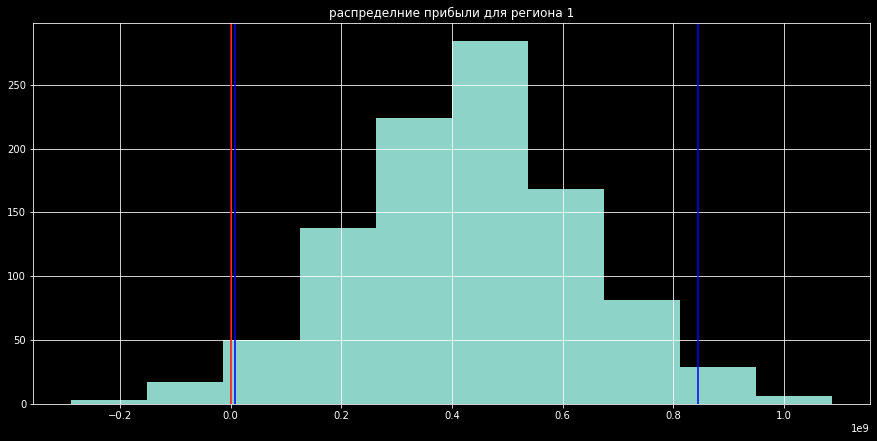

prob of losses is 9.5 % for region 2
average revenue of 200 best points in region 2 is 341732001.06600577
95%-ый доверительный интервал среднего: (325429383.4498779, 358034618.6821336)
95%-ый доверительный интервал прибыли: -157959007.96853107 | 853630306.7651608


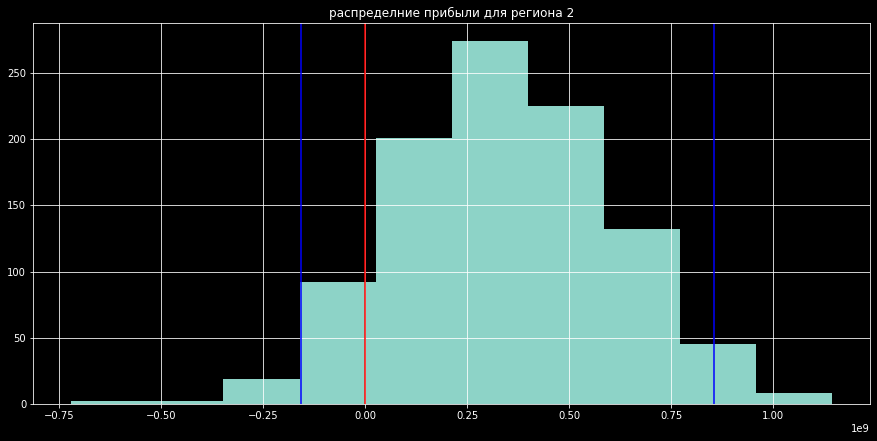

In [32]:
def revenue_report(sample_df, reg_data, region):

    sample_df['revenue'] = sample_df['product'] * revenue_per_product
    sample_df['profit'] = sample_df['revenue'] - cost_per_point
    #разница с объемом сырья в точке безубыточности
    sample_df['volume_dif'] = sample_df['product'] - zero_revenue_volume

    region_sc_featiures = reg_data[region]['scaler'].transform(sample_df[features])
    sample_df['pred'] = reg_data[region]['model'].predict(region_sc_featiures)

    return sample_df
    #выборка из 200 лучших 

for region in [0,1,2]:
    sample_df = reg_data[region]['x_valid'].join(reg_data[region]['y_valid']) 

    sample_df = revenue_report(sample_df, reg_data, region)

    #выборка 200 лучших точек по мнению модели 
    revenue_count = []
    losses = []

    for i in range(1000):
        revenue_sample = sample_df.sample(n = 500, replace = True, 
        random_state=state).sort_values(by = 'pred', ascending=False)[:200]



        if revenue_sample['profit'].sum() >= 0:
            revenue_count.append(revenue_sample['profit'].sum())
        else:
            losses.append(revenue_sample['profit'].sum())

    prob_of_losses = len(losses)/(len(losses)+len(revenue_count))

    print('prob of losses is', round(prob_of_losses*100,2), '% for region', region)
    revenue_sample =  pd.Series(losses + revenue_count)
    print(f'average revenue of 200 best points in region {region} is', revenue_sample.mean())
    lower = revenue_sample.quantile(0.025)
    upper = revenue_sample.quantile(0.975)
    confidence_interval = st.t.interval(0.95, len(revenue_sample)-1, loc=revenue_sample.mean(), scale=revenue_sample.sem())
    print("95%-ый доверительный интервал среднего:", confidence_interval)
    print("95%-ый доверительный интервал прибыли:", lower, '|', upper)
    pd.Series(revenue_count+losses).hist()
    plt.title(f'распределние прибыли для региона {region}')
    plt.axvline(0, color = 'r', label = 'zero point')
    plt.axvline(lower, color = 'b', label = 'lower')
    plt.axvline(upper, color = 'b', label = 'upper')
    plt.show()